# Perceptron 
Perceptron is a single-layer neural network linear or a Machine Learning algorithm used for supervised learning of various binary classifiers

## Import Packages 
- `numpy` for n-dim array processing
- `sklearn.datasets` for generating datasets to train on
- `matplotlib` for visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Create Dataset
The dataset consists of 150 samples sampled from a distribution with 2 clusters and has 2 features.

In [2]:
X, y = make_blobs(n_samples = 150, n_features = 2, centers=2, cluster_std=1.05, random_state=2)
print(X.shape, y.shape)

(150, 2) (150,)


## Visualizing the Dataset 

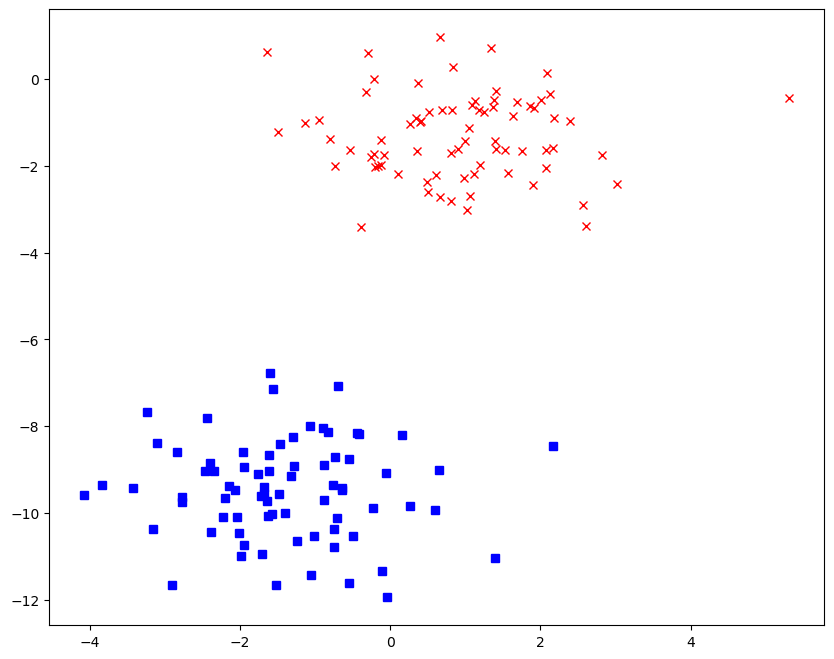

In [3]:
plt.figure(figsize=(10, 8))

plt.plot(X[y==1, 0], X[y==1, 1], 'rx')
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.show()

## Function Definitions 

In [8]:
def step_fn(z):
    """ Serves as the activation function for the perceptron. """
    return 1.0 if z > 0 else 0.0

# Training Function 
def perceptron(X, y, lr, epochs):
    """Returns the trained parameters and no. of misses per epoch
    
    The triaining loop for the perceptron algorithm.
    
    Args:
        X (np.ndarray): The training input.
        y (np.ndarray): The labels for the input.
        
    Returns:
        theta (np.ndarray): The trained weights.
        n_miss_list (list[int]): A list of no. of misses in each epoch
    """
    
    m, n = X.shape
    theta = np.zeros((n + 1, 1)) # Weights initalized with zero with shape (n+1, 1)
    n_miss_list = []
    
    for epoch in range(epochs):
        n_miss = 0
        
        for x_i, y_i in zip(X, y):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1) # [[1], [x_1], [x_2]]
            y_hat = step_fn(np.dot(x_i.T, theta))
            
            # Update weight if miss classified
            if np.squeeze(y_hat) - y_i != 0:
                theta += lr * (y_i - y_hat) * x_i # Learing rate * error * input
                n_miss += 1
                
        n_miss_list.append(n_miss)
        n_miss = 0
    
    return theta, n_miss_list
    
def plot_decision_boundary(X, y,  theta):
    """Plots the decision boundary of the model.
    
    Args:
        X (np.ndarray): input data
        y (np.ndarray): labels of input data
        theta (np.ndarray): the parameters of the model
    """
    
    x1 = [min(X[:, 0]), max(X[:, 0])]
    
    m  = -theta[1] / theta [2]
    c = - theta[0] / theta[2]
    
    x2 = m* x1 + c
    
    plt.figure(figsize=(10, 8))

    plt.plot(X[y==1, 0], X[y==1, 1], 'rx')
    plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    plt.title("Perceptron Algorithm")
    plt.plot(x1, x2, 'y-')
    
    plt.show()
    

## Training the Perceptron

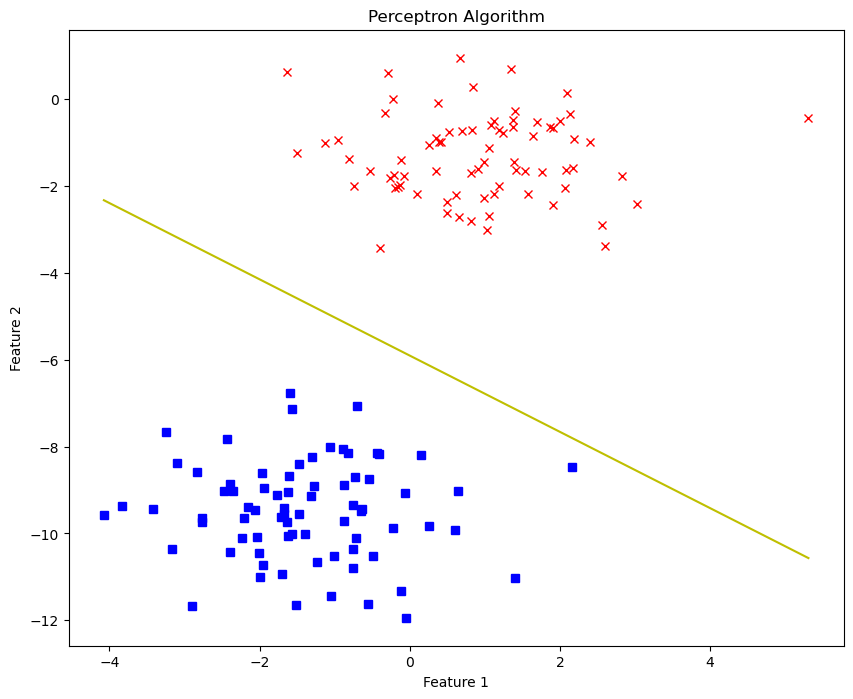

In [9]:
theta , misses = perceptron(X, y, 0.5 , 100)
plot_decision_boundary(X, y, theta)